In [1]:
from datetime import datetime

import time
import os
import sys
from pathlib import Path

import numpy as np
from scipy.stats import lognorm
import pandas as pd

from astropy import stats
from astropy.io import fits
from astropy.nddata import CCDData
import astropy.units as u

import ccdproc

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

from mmtwfs.wfs import wfs_norm

%load_ext autoreload
%autoreload 2

In [2]:
%cd ~/MMT/matcam/latest/

/Users/tim/MMT/matcam/latest


In [3]:
ic = ccdproc.ImageFileCollection(".", keywords="*", glob_include="ratcam*")

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-190147.fits" contains multiple entries for "ra", the pair "ra=08:12:45.951" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-190147.fits" contains multiple entries for "dec", the pair "dec=31:41:30.379" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-190147.fits" contains multiple entries for "airmass", the pair "airmass=1" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-190156.fits" contains multiple entries for "ra", the pair "ra=08:12:54.226" will be ignored.
  UserWarning)
/Users/tim/conda/en

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193554.fits" contains multiple entries for "ra", the pair "ra=09:34:11.422" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193554.fits" contains multiple entries for "dec", the pair "dec=36:23:50.681" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193554.fits" contains multiple entries for "airmass", the pair "airmass=1.0181" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193555.fits" contains multiple entries for "ra", the pair "ra=09:34:11.430" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193652.fits" contains multiple entries for "ra", the pair "ra=09:34:11.429" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193652.fits" contains multiple entries for "dec", the pair "dec=36:23:50.698" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193652.fits" contains multiple entries for "airmass", the pair "airmass=1.0175" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193653.fits" contains multiple entries for "ra", the pair "ra=09:34:11.437" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193738.fits" contains multiple entries for "ra", the pair "ra=09:34:11.419" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193738.fits" contains multiple entries for "dec", the pair "dec=36:23:50.699" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193738.fits" contains multiple entries for "airmass", the pair "airmass=1.017" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-193739.fits" contains multiple entries for "ra", the pair "ra=09:34:11.419" will be ignored.
  UserWarning)
/Users/tim/cond

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200255.fits" contains multiple entries for "ra", the pair "ra=09:34:11.386" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200255.fits" contains multiple entries for "dec", the pair "dec=36:23:50.915" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200255.fits" contains multiple entries for "airmass", the pair "airmass=1.0059" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200256.fits" contains multiple entries for "ra", the pair "ra=09:34:11.386" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200347.fits" contains multiple entries for "ra", the pair "ra=09:34:11.381" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200347.fits" contains multiple entries for "dec", the pair "dec=36:23:50.837" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200347.fits" contains multiple entries for "airmass", the pair "airmass=1.0057" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200348.fits" contains multiple entries for "ra", the pair "ra=09:34:11.381" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200444.fits" contains multiple entries for "ra", the pair "ra=09:34:11.376" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200444.fits" contains multiple entries for "dec", the pair "dec=36:23:50.862" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200444.fits" contains multiple entries for "airmass", the pair "airmass=1.0055" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200445.fits" contains multiple entries for "ra", the pair "ra=09:34:11.381" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200538.fits" contains multiple entries for "ra", the pair "ra=09:34:11.370" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200538.fits" contains multiple entries for "dec", the pair "dec=36:23:50.808" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200538.fits" contains multiple entries for "airmass", the pair "airmass=1.0053" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-200540.fits" contains multiple entries for "ra", the pair "ra=09:34:11.382" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-201356.fits" contains multiple entries for "ra", the pair "ra=09:34:11.354" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-201356.fits" contains multiple entries for "dec", the pair "dec=36:23:50.731" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-201356.fits" contains multiple entries for "airmass", the pair "airmass=1.0038" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-201357.fits" contains multiple entries for "ra", the pair "ra=09:34:11.353" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-201616.fits" contains multiple entries for "ra", the pair "ra=09:34:11.350" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-201616.fits" contains multiple entries for "dec", the pair "dec=36:23:50.629" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-201616.fits" contains multiple entries for "airmass", the pair "airmass=1.0036" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-201619.fits" contains multiple entries for "ra", the pair "ra=09:34:11.347" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-203943.fits" contains multiple entries for "ra", the pair "ra=09:34:11.375" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-203943.fits" contains multiple entries for "dec", the pair "dec=36:23:49.643" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-203943.fits" contains multiple entries for "airmass", the pair "airmass=1.0051" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-203944.fits" contains multiple entries for "ra", the pair "ra=09:34:11.375" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-211315.fits" contains multiple entries for "ra", the pair "ra=07:44:25.663" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-211315.fits" contains multiple entries for "dec", the pair "dec=24:23:51.376" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-211315.fits" contains multiple entries for "airmass", the pair "airmass=1.2344" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-211632.fits" contains multiple entries for "ra", the pair "ra=06:16:26.176" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-214257.fits" contains multiple entries for "ra", the pair "ra=16:08:44.052" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-214257.fits" contains multiple entries for "dec", the pair "dec=44:56:24.968" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-214257.fits" contains multiple entries for "airmass", the pair "airmass=2.0341" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-214300.fits" contains multiple entries for "ra", the pair "ra=16:08:44.048" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-220924.fits" contains multiple entries for "ra", the pair "ra=13:18:20.507" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-220924.fits" contains multiple entries for "dec", the pair "dec=-18:18:46.403" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-220924.fits" contains multiple entries for "airmass", the pair "airmass=1.8584" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-221003.fits" contains multiple entries for "ra", the pair "ra=13:18:20.522" will be ignored.
  UserWarning)
/Users/tim/co

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-224135.fits" contains multiple entries for "ra", the pair "ra=09:07:43.279" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-224135.fits" contains multiple entries for "dec", the pair "dec=10:40:12.705" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-224135.fits" contains multiple entries for "airmass", the pair "airmass=1.381" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-224138.fits" contains multiple entries for "ra", the pair "ra=09:07:43.292" will be ignored.
  UserWarning)
/Users/tim/cond

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-231404.fits" contains multiple entries for "ra", the pair "ra=09:03:58.126" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-231404.fits" contains multiple entries for "dec", the pair "dec=54:16:54.370" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-231404.fits" contains multiple entries for "airmass", the pair "airmass=1.3449" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-231441.fits" contains multiple entries for "ra", the pair "ra=09:03:58.112" will be ignored.
  UserWarning)
/Users/tim/con

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-234324.fits" contains multiple entries for "ra", the pair "ra=14:07:53.145" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-234324.fits" contains multiple entries for "dec", the pair "dec=43:51:29.869" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-234324.fits" contains multiple entries for "airmass", the pair "airmass=1.0554" will be ignored.
  UserWarning)
/Users/tim/conda/envs/py37/lib/python3.7/site-packages/ccdproc/image_collection.py:550: UserWarning: Header from file "./ratcam_20190415-234349.fits" contains multiple entries for "ra", the pair "ra=14:07:53.125" will be ignored.
  UserWarning)
/Users/tim/con

In [4]:
ic.summary['exptime'][ic.summary['frame'] == 'Dark']

<MaskedColumn name='exptime' dtype='float64' length=22>
10.0
10.0
10.0
10.0
10.0
10.0
10.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
30.0
30.0
30.0
30.0
30.0

In [5]:
dark_1_list = ic.files_filtered(frame='Dark', exptime=1.0)
dark_10_list = ic.files_filtered(frame='Dark', exptime=10.0)
dark_30_list = ic.files_filtered(frame='Dark', exptime=30.0)

In [6]:
dark_1 = ccdproc.combine(dark_1_list, output="dark_1sec.fits", method='median', unit="adu")
dark_10 = ccdproc.combine(dark_10_list, output="dark_10sec.fits", method='median', unit="adu")
dark_30 = ccdproc.combine(dark_30_list, output="dark_30sec.fits", method='median', unit="adu")

In [7]:
def ratcam_process(fname):
    raw_fits = fits.open(fname)[0]
    header = raw_fits.header
    raw_data = CCDData(raw_fits.data, unit='adu', meta=header)
    exptime = header['EXPTIME']
    if exptime == 1.0:
        d = ccdproc.subtract_dark(raw_data, dark_1, dark_exposure=1.0*u.second, data_exposure=exptime*u.second)
    elif exptime == 10.0:
        d = ccdproc.subtract_dark(raw_data, dark_10, dark_exposure=10.0*u.second, data_exposure=exptime*u.second)
    else:
        d = ccdproc.subtract_dark(raw_data, dark_30, dark_exposure=30.0*u.second, data_exposure=exptime*u.second)
    return d

def ratcam_disp(fname):
    d = ratcam_process(fname)
    norm = wfs_norm(d)
    plt.imshow(d, norm=norm)
    plt.show()
    return d

<IPython.core.display.Javascript object>


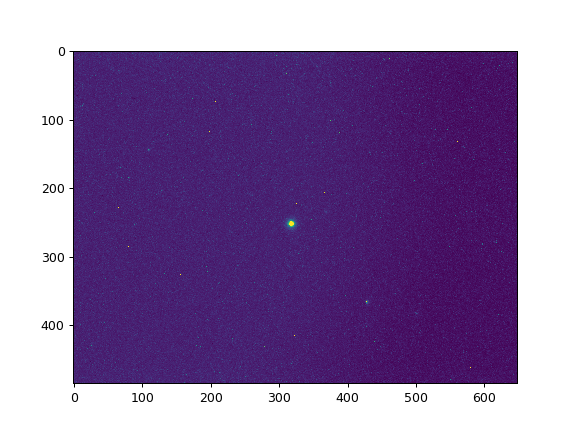

CCDData([[162.5, 190. , 243. , ..., 168. , 183. , 152.5],
         [223.5, 196.5, 160.5, ...,  90. , 126.5, 160.5],
         [226. , 126.5, 227.5, ...,  99.5, 226. ,  62. ],
         ...,
         [168.5, 217.5, 215.5, ...,  97.5,  72. ,  90. ],
         [222. , 232. , 224.5, ..., 155. , 149.5, 167. ],
         [162.5, 163.5, 137. , ...,  75. , 103. ,  59.5]])

In [8]:
ratcam_disp('ratcam_20190415-193752.fits')

<IPython.core.display.Javascript object>


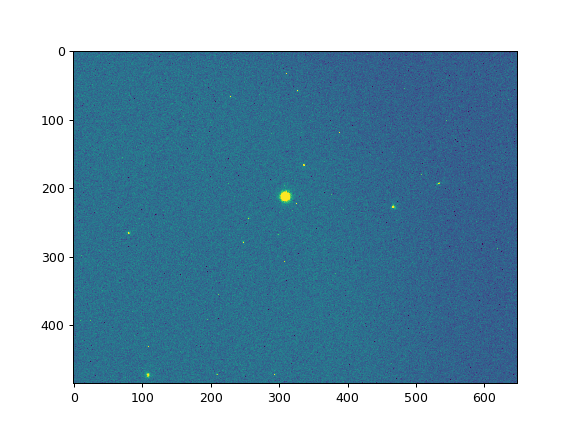

In [10]:
initial_pos2 = ratcam_disp('ratcam_20190415-201957.fits')
initial_pos2.write("init.fits", overwrite=True)

<IPython.core.display.Javascript object>


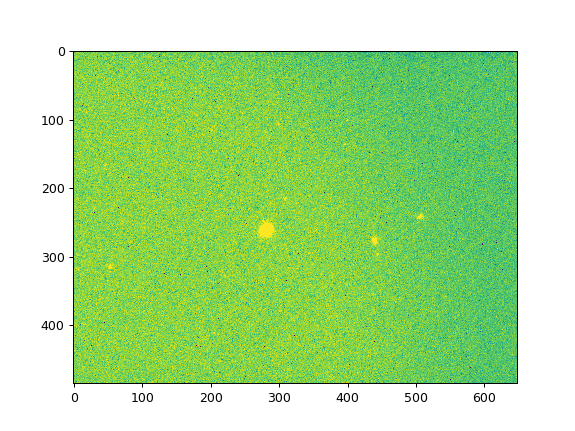

In [11]:
el_plus_300 = ratcam_disp('ratcam_20190415-202117.fits')
el_plus_300.write("el_plus_300.fits", overwrite=True)

<IPython.core.display.Javascript object>


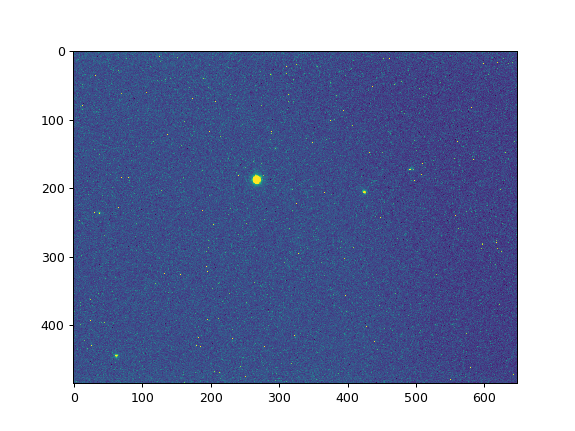

In [12]:
az_plus_300 = ratcam_disp('ratcam_20190415-202232.fits')
az_plus_300.write("az_plus_300.fits", overwrite=True)

<IPython.core.display.Javascript object>


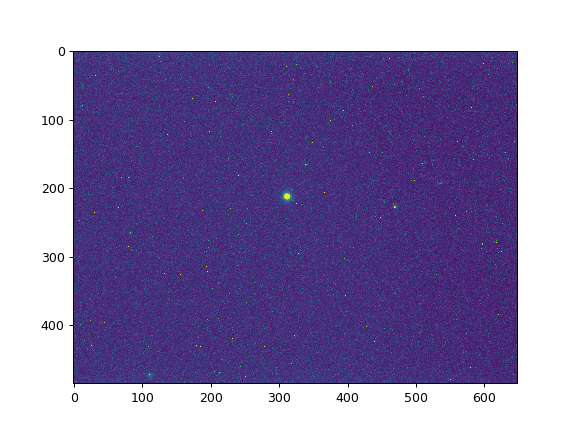

In [13]:
zero_offsets = ratcam_disp('ratcam_20190415-202350.fits')
zero_offsets.write("zero_offsets.fits", overwrite=True)

<IPython.core.display.Javascript object>


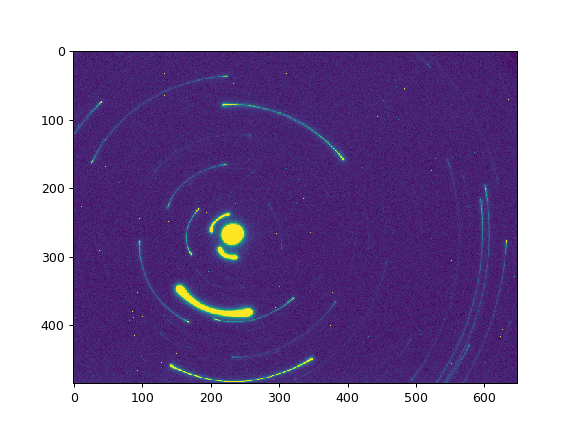

In [14]:
cor = ratcam_disp('ratcam_20190415-204359.fits')

# CoR coordinates are (236.4, 276.8)

In [16]:
cor_trim = cor[278-150:278+150,239-150:239+150]

In [17]:
cor_trim.write("cor_trim.fits")

<IPython.core.display.Javascript object>


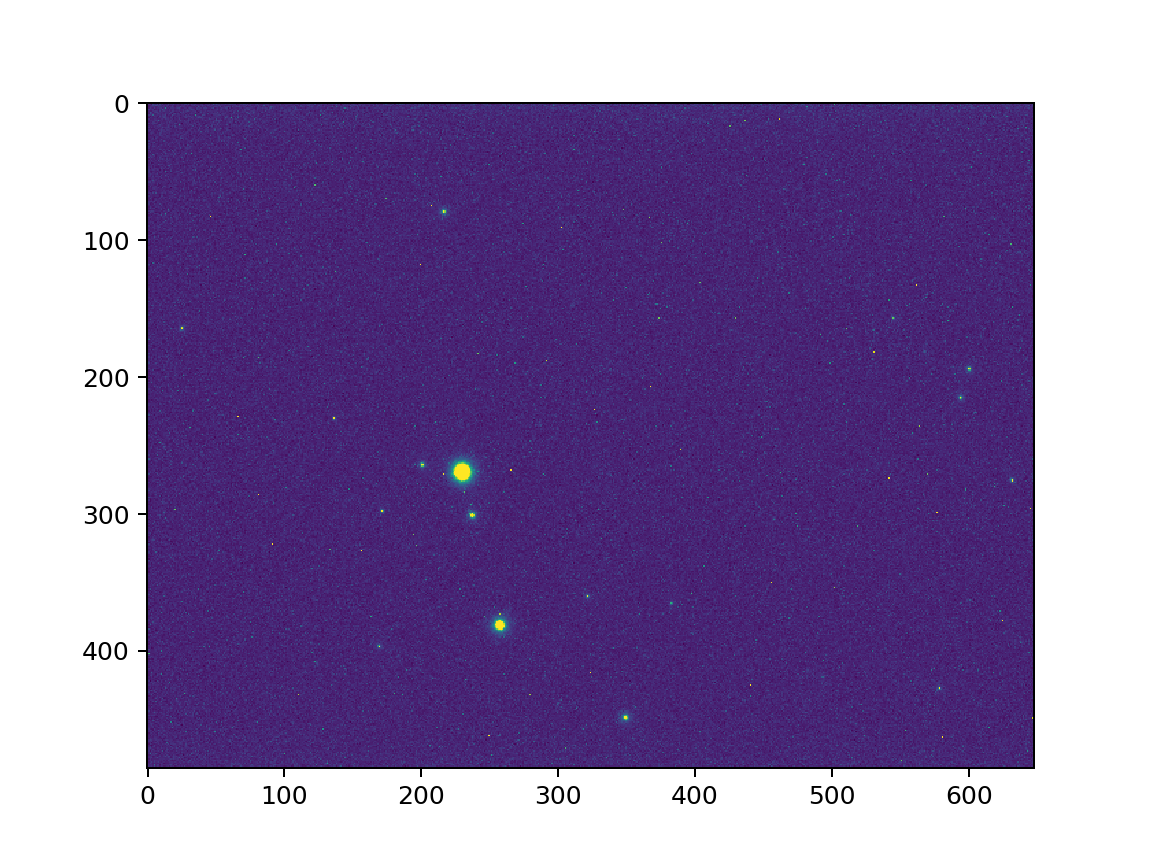

In [29]:
FK5_0360 = ratcam_disp('ratcam_20190415-205323.fits')

<IPython.core.display.Javascript object>


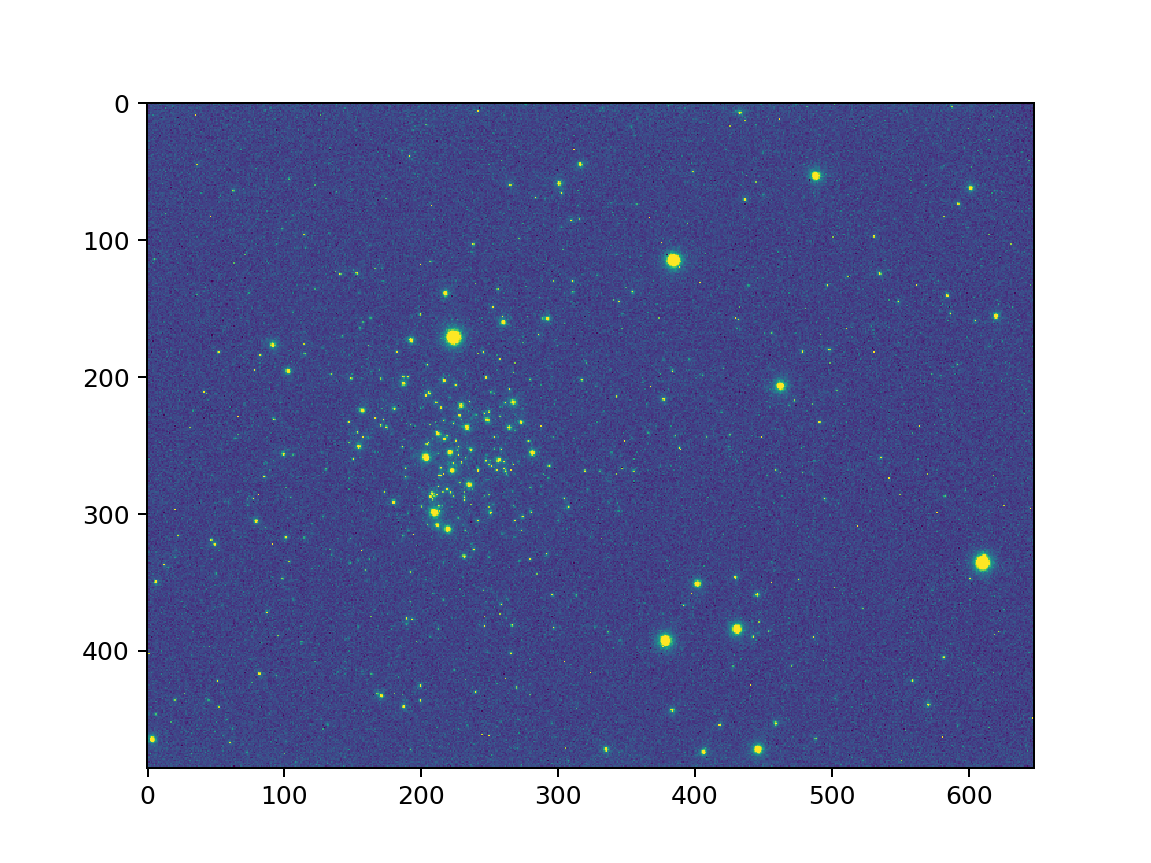

In [23]:
m67 = ratcam_disp('ratcam_20190415-210717.fits')

In [26]:
m67.write("m67.fits")

In [30]:
FK5_0360.write("FK5_0360.fits", overwrite=True)

In [34]:
ic.summary['catid']

<MaskedColumn name='catid' dtype='str8' length=722>
 unknown
 unknown
 unknown
 unknown
 unknown
 unknown
 unknown
 unknown
 unknown
 unknown
 unknown
 unknown
     ...
FK5-1368
FK5-1368
FK5-1368
FK5-0629
FK5-0629
FK5-0629
FK5-1425
FK5-1425
FK5-1425
FK5-1384
FK5-1384
FK5-1384

<IPython.core.display.Javascript object>


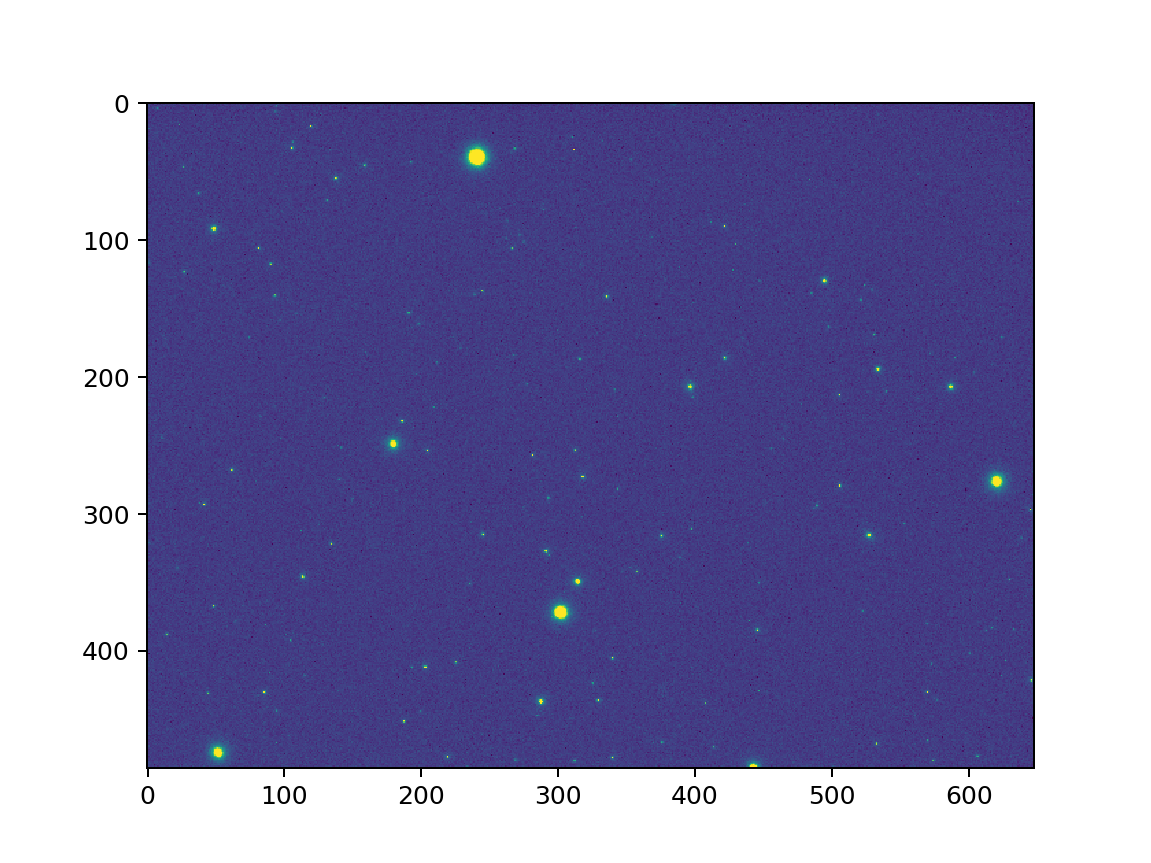

In [35]:
m44 = ratcam_disp("ratcam_20190415-210338.fits")

In [36]:
m44.write("m44.fits")

In [ ]:
light_10_list = ic.files_filtered(frame='Light', exptime=10.0)
light_30_list = ic.files_filtered(frame='Light', exptime=30.0)